# **Técnicas de Programação 1 - NumPy**

---

**1. Introdução**<br>
- 1a. Motivação<br>
- 1b. Instalação e importação<br>

**2. Ndarrays**<br>
- 2a. Definição<br>
- 2b. Cuidados especiais ao copiar e modificar ndarrays<br>
- 2c. Propriedades básicas de ndarrays<br>
- 2d. Reshaping de ndarrays<br>
- 2e. Empilhando ndarrays<br>
- 2f. Tipos de dados e tamanho em memória<br>
- 2g. Convertendo dypes de ndarrays<br>
- 2h. Indexing & slicing<br>
- 2i. Máscara booleana e seleção avançada<br>
- 2j. Exercícios I

---

## **1. Introdução**

O **NumPy** é uma biblioteca fundamental para computação numérica em Python, oferecendo estruturas de dados eficientes, como arrays multidimensionais, e operações matemáticas otimizadas, sendo essencial para análise e manipulação eficaz de dados numéricos.

#### **1a. Motivação**

Uma introdução motivacional a alguns fatos fundamentais:

* Muitos trabalhos empresariais envolvem cálculos matemáticos avançados e dependem de bibliotecas especializadas.
* O NumPy realiza cálculos com Arrays Multidimensionais (em matemática, chamamos de vetores, matrizes ou tensores). Esses objetos fundamentais da biblioteca são basicamente "listas de listas de listas de ...", e atualmente são essenciais para estatística, aprendizado de máquina, processamento de imagem, texto, áudio, otimização e simulação de sistemas reais.
* Estratégias de otimização de armazenamento e processameto, como o uso de linguagens de mais baixo nível (C e Fortran), a tipagem estática e o armazenamento contíguo em memória, dentre outras, tornam as operações do NumPy muito mais eficientes do que operações baseadas em listas nativas no Python.
* Quando organizamos um código para aproveitar as operações do NumPy, é comum dizermos que nós estamos "vetorizando" o nosso código. Isso significa que evitamos loops explícitos no código Python, e no lugar deles aproveitamos ao máximo as operações de arrays do NumPy.
* Bibliotecas populares, como SciPy, pandas, scikit-learn e statsmodels, dependem das funcionalidades do NumPy para computação científica e ciência de dados.



> A vetorização no NumPy é a prática de aplicar operações diretamente a arrays multidimensionais, evitando a necessidade de loops explícitos em Python. Essa abordagem aproveita a eficiência das operações vetorizadas implementadas em C, resultando em códigos mais concisos e eficientes. Em vez de iterar manualmente sobre cada elemento, as operações são executadas de forma simultânea em todo o array, proporcionando ganhos significativos de desempenho.



Vamos ver um pequeno exemplo?

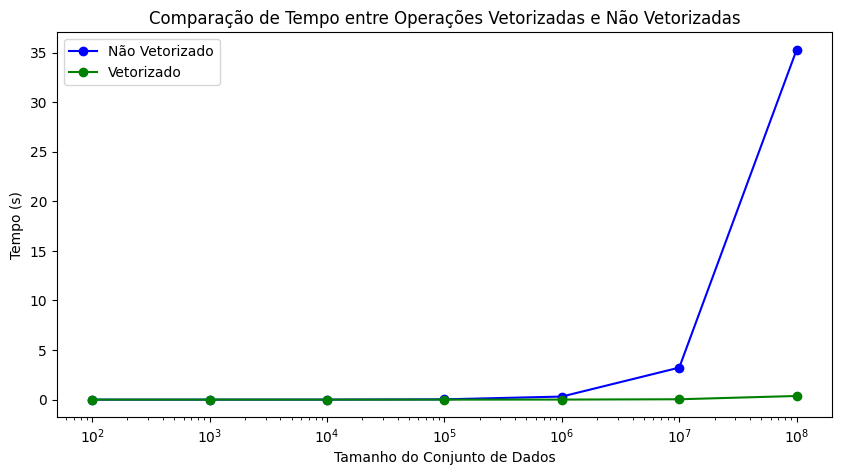

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

tamanhos = [10**i for i in range(2, 9)]  # De 100 a 100 milhões de elementos

tempos_nao_vetorizados = []
tempos_vetorizados = []

for tamanho in tamanhos:
    # Criar conjunto de dados
    dados = np.random.rand(tamanho)

    # Operação Não Vetorizada: Usando loop
    start_time = time.time()
    resultado_nao_vetorizado = []
    for elemento in dados:
        resultado_nao_vetorizado.append(elemento ** 2)
    tempo_nao_vetorizado = time.time() - start_time
    tempos_nao_vetorizados.append(tempo_nao_vetorizado)

    # Operação Vetorizada: Usando NumPy
    start_time = time.time()
    resultado_vetorizado = dados ** 2
    tempo_vetorizado = time.time() - start_time
    tempos_vetorizados.append(tempo_vetorizado)

# Plotar os tempos em um único gráfico de linha
plt.figure(figsize=(10, 5))

# Tempos Não Vetorizados
plt.plot(tamanhos, tempos_nao_vetorizados, marker='o', linestyle='-', color='blue', label='Não Vetorizado')

# Tempos Vetorizados
plt.plot(tamanhos, tempos_vetorizados, marker='o', linestyle='-', color='green', label='Vetorizado')

plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.title('Comparação de Tempo entre Operações Vetorizadas e Não Vetorizadas')
plt.xlabel('Tamanho do Conjunto de Dados')
plt.ylabel('Tempo (s)')
plt.legend()

plt.show()

In [4]:
# Vamos comparar mais de perto os tempos do código não-vetorizado vs vetorizado?
print([f'{_:.03f}s' for _ in tempos_nao_vetorizados])
print([f'{_:.03f}s' for _ in tempos_vetorizados])
print(f'A execução mais custosa é {tempos_nao_vetorizados[-1]/tempos_vetorizados[-1]:.2f} vezes mais demorada na versão não vetorizada.')

['0.000s', '0.000s', '0.003s', '0.029s', '0.308s', '3.228s', '35.297s']
['0.000s', '0.000s', '0.000s', '0.001s', '0.005s', '0.036s', '0.368s']
A execução mais custosa é 96.03 vezes mais demorada na versão não vetorizada.


Você notou que a complexidade da operação do exemplo acima é linear?<br>
E se estivéssesos trabalhando com um problema de complexidade quadrática?

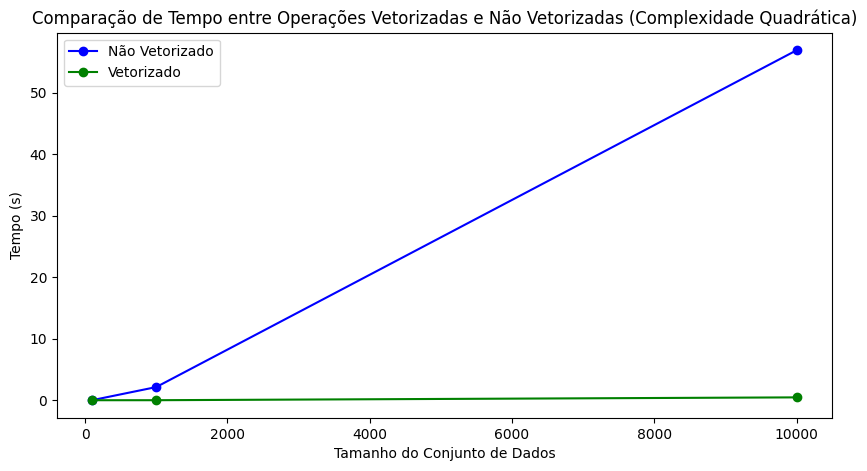

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Tamanhos dos conjuntos de dados
tamanhos = [10**i for i in range(2, 5)]  # De 100 a 10 mil elementos

tempos_nao_vetorizados = []
tempos_vetorizados = []

for tamanho in tamanhos:
    # Criar conjunto de dados
    dados = np.random.rand(tamanho)

    # Operação Não Vetorizada: Usando loops aninhados
    start_time = time.time()
    resultado_nao_vetorizado = []
    for i in range(len(dados)):
        for j in range(len(dados)):
            resultado_nao_vetorizado.append(dados[i] * dados[j])
    soma_produto_pares_nao_vetorizada = sum(resultado_nao_vetorizado)
    tempo_nao_vetorizado = time.time() - start_time
    tempos_nao_vetorizados.append(tempo_nao_vetorizado)

    # Operação Vetorizada: Usando NumPy
    start_time = time.time()
    soma_produto_pares_vetorizada = np.sum(np.outer(dados, dados))
    tempo_vetorizado = time.time() - start_time
    tempos_vetorizados.append(tempo_vetorizado)

# Plotar os tempos em um único gráfico de linha
plt.figure(figsize=(10, 5))

# Tempos Não Vetorizados
plt.plot(tamanhos, tempos_nao_vetorizados, marker='o', linestyle='-', color='blue', label='Não Vetorizado')

# Tempos Vetorizados
plt.plot(tamanhos, tempos_vetorizados, marker='o', linestyle='-', color='green', label='Vetorizado')

# plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.title('Comparação de Tempo entre Operações Vetorizadas e Não Vetorizadas (Complexidade Quadrática)')
plt.xlabel('Tamanho do Conjunto de Dados')
plt.ylabel('Tempo (s)')
plt.legend()

plt.show()

In [9]:
# Vamos comparar mais de perto os tempos do código não-vetorizado vs vetorizado?
print([f'{_:.03f}s' for _ in tempos_nao_vetorizados])
print([f'{_:.03f}s' for _ in tempos_vetorizados])
print(f'A execução mais custosa é {tempos_nao_vetorizados[-1]/tempos_vetorizados[-1]:.2f} vezes mais demorada na versão não vetorizada.')

['0.005s', '2.137s', '56.912s']
['0.000s', '0.003s', '0.464s']
A execução mais custosa é 122.75 vezes mais demorada na versão não vetorizada.


É impressionante como a eficiência computacional pode virar um problema rapidamente, se estivermos lidando com operações de complexidade mais elevada!

> "*Se você está escrevendo um loop, você está fazendo errado.*"<br>
Kreischer, V. A., 2020: reclamando da qualidade duvidosa do meu código.

O excesso de loops é um hábito comum em programadores habituados com linguagens de progarmação de mais baixo nível.

Vale mencionar: um bom guia para quem deseja se aprofundar no "jeito Python" de fazer as coisas, é o livro [The Pythonic Way](https://www.amazon.com.br/Pythonic-Way-Architects-Conventions-Development/dp/9391030122).

Mas, ainda que de maneira não tão formal e aprofundada, nesta seção discutiremos (e experimentaremos) bastante as potencialidades do NumPy e do "jeito Python" de resolver problemas intrinsicamente iterativos.

E será na seção seguinte, sobre Pandas, que vamos perceber o quanto os conceitos que serão apresentados aqui permeiam muito mais do dia-a-dia de um profissional de dados do que muitas vezes imaginamos.

#### **1b. Instalação e importação**

Assim, para que possamos dar nosso primeiros pasos com o NumPy, vamos falar rapidamente sobre instalação e importação.

É extremamente provável que sua instalação Python já inclua por padrão a instalação do pacote NumPy.

Caso não, você pode:
- Simplesmente instalar o pacote Anaconda com a configuração padrão (https://www.anaconda.com/distribution/), que já inclúi por padrão a biblioteca NumPy e diversas bibliotecas científicas e ligadas a Machine Learning e Data Science.
- Utilizar o gerenciador de pacotes de sua preferência para instalar a bibliteca via linha de comando. Abra um terminal e digite `conda install numpy` ou `pip install numpy`, por exemplo.

Por fim, para checar a sua intalação e também para fazer uso do pacote, basta importar o NumPy como outra biblioteca qualquer, fazendo

In [10]:
import numpy as np

Notas:
- Note que no Google Colab o NumPy já está instalado por padrão.
- É uma prática comum apelidar o pacote de *np*

## **2. Ndarrays**

#### **2a. Definição**

Na introdução, comentamos que a estrutura de dados básica do NumPy é um "array multidimensional". Esse objeto do NumPy se chama ndarray. Um mnemônico para ajudar a lembrar é lembrar pensar em "N Dimensões ARRAY", ou "NDARRAY". Basta lembrar que o "nd" significa "n-dimensional", pois também podemos ter tabelas multidimensionais.

Essa estrutura é semelhante aos arrays de outras linguagens de programação. Pode ser uma lista de valores, uma tabela, ou uma tabela de tabelas.

O mais comum é usarmos ndarrays como listas ou tabelas de valores.

No caso de uma lista, nós temos um ndarray de uma dimensão. Matematicamente, esse objeto é equivalente a um **vetor**.

O método mais comum para criar um ndarray é através da função `np.array`.<br>Assim, para criar nosso primeiro "vetor" com NumPy, podemos fazer:

In [14]:
var = np.array([1, 2, 3])
print(var)

[1 2 3]


Se olharmos o tipo da variável vetor, veremos que ela é do tipo NumPy.ndarray.

In [15]:
type(var)

numpy.ndarray

Neste ponto, a diferença mais marcante dos ndarrays para as listas do python nativo, é a **tipagem estática**, sobre a qual tambpem falamos na introdução. No contexto de ndarrays, todos os elementos de um array precisam ter o mesmo tipo de dados.

In [19]:
vetor = np.array([3.14, 10, "Matheus", True])

In [20]:
print(type(vetor[0]))
print(type(vetor[1]))
print(type(vetor[2]))
print(type(vetor[3]))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


Ou seja, o NumPy fará uma coerção automática para garantir que todos os elementos tenham o mesmo tipo. Neste caso, todos os elementos serão convertidos para strings, resultando em um ndarray do tipo string. Você pode ver o tipo geral dos dados que fazem parte de um array da segunte forma:

In [21]:
print(vetor)

['3.14' '10' 'Matheus' 'True']


In [22]:
teste = np.array([10,15,20])

In [23]:
teste

array([10, 15, 20])

In [24]:
teste[0]+teste[1]

25

In [28]:
teste[2] = 'palavra'

ValueError: invalid literal for int() with base 10: 'palavra'

In [27]:
teste

array([ 10,  15, 100])

In [39]:
teste = np.array([1, 5, 'AAA', 10])

In [40]:
teste.dtype

dtype('<U21')

In [33]:
type(teste[0])

numpy.float64

In [34]:
teste.dtype

dtype('float64')

Você que já teve experiência com Pandas:<br>
Já se atrapalhou com coerções de tipo automáticas acontecendo nas colunas de um dataframe?

Continuando:<br>
Além de um vetor, podemos criar também uma tabela com duas dimensões. Nesse caso, temos uma **matriz**.

In [43]:
matriz = np.array([['a','b'], ['c','d']])

In [44]:
print(matriz)

[['a' 'b']
 ['c' 'd']]


In [45]:
matriz[1][0]

'c'

É possível, também, aumentar o número de dimensões.<br>
Nesse caso, se temos 3 dimensões, por exemplo, podemos considerar que temos uma lista de tabelas. Se temos 4 dimensões, então podemos dzer que temos uma tabela cujos elementos são outras tabelas. Assim, quanto mais dimensões, nós vamos empilhando em uma lista objetos com menos dimensões. Se forem 5 dimensões, temos uma lista de ndarrays de 4 dimensões (ou uma lista de tabelas de tabelas). E assim por diante.

Matematicamente, sempre que estamos diante de um objeto de 3 ou mais dimensões, nós chamamos este objeto de **tensor**.

In [48]:
tensor = np.array(
    [
        [
            ['a', 'b'],
            ['c', 'd']
        ],
        [
            ['e', 'f'],
            ['g', 'h']
        ]
    ]
)

In [49]:
print(tensor)

[[['a' 'b']
  ['c' 'd']]

 [['e' 'f']
  ['g' 'h']]]


Note que a variável tensor nada mais é que duas tabelas.

Uma representação visual de ndarrays podem ajudar a entender melhor o que está acontecendo.

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b50bd331-732b-48a4-9d46-01f20c15ab29.png width=500>

Ainda, é comum falarmos de cada dimensão de um ndarray como um "eixo".<br>Assim, se um ndarray tem 3 dimensões, nós podemos falar da "1ª dimensão do array" (o eixo 0 do array), da "2ª dimensão do array" (o eixo 1 do array) e da "3ª dimensão do array" (eixo 2 do array).<br>Trazendo alguma abstração para a nossa forma de ver a estrutura, um ndarray com formato (3, 3, 2) poderia ser entendido como uma lista ao longo do seu primeiro eixo (eixo 0), por exemplo. Essa lista seria composta por 3 matrizes de tamanho 3 x 2. De forma totalmente equivalente, a gente poderia pensar que ele é uma lista com 2 matrizes 3 x 3 ao longo do seu terceiro eixo (eixo 2).

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/1e527c6a-ea64-46e3-bd31-ffba06749000.png width=600>

O ndarray é a estrutura de dados básica do NumPy, e é a estrutura que usaremos sempre. Todo o poder do NumPy vem da implementação desta estrutura de dados e das operações a ela relacionadas, que são bem mais eficientes do que as operações nativas que poderiam incindir sobre listas comuns do Python.

Esses objetos também são muito comuns em matemática, pois representam basicamente vetores e matrizes. Assim, é bem direto "vetorizar" nosso código escrevendo-o de forma bem parecida com o que faríamos em notação matemática.

Obs: Falamos antes também de tensores. Não é importante entender o que eles são para poder usar o NumPy. Apenas cálculos muito específicos se utilizam da matemática de tensores. Para a maioria dos casos, basta ter a visão que demos anteriormente, sobre como eles são basicamente "matrizes com 3 ou mais dimensões". Isso significa que eles podem ser uma lista de tabelas, uma tabela de tabelas, uma lista de tabelas de tabelas, uma tabela de tabelas de tabelas, e assim por diante.

#### **2b. Cuidados especiais ao copiar e modificar ndarrays**

Antes de começar a ver as propriedades básicas de um ndarray, é importante ter uma questão muito importante em mente. Assim como os arrays nativos do Python, devido à forma como o NumPy trabalha com ndarrays na memória do computador, eles se comportam da forma mostrada abaixo.

#### **2c. Propriedades básicas de ndarrays**

##### Dimensão e formato

Como vimos antes, é possível criar um ndarray com diferentes dimensões e formatos.<br>Cada ndarray tem os atributos **ndim** e **shape**, que guardam estas informações. Logo, para sabermos como é o nosso ndarray, basta acessarmos estes atributos.

Isso é extremamente importante para nos ajudar quando temos um ndarray muito grande e precisamos ter uma ideia de seu tamanho e dimensionalidade. Além disso, esses atributos também nos ajudam quando queremos criar funções genéricas que atuem em ndarrays.

A partir do formato do array, nós poderíamos obter também o número de elementos do array. Porém, objetos ndarray já têm o atributo `size`, para facilitar nosso trabalho.


#### **2d. Reshaping de ndarrays**

Muitas vezes queremos mudar o formato de um array. Para isso, utilizamos a função `reshape`.<br>Por exemplo, podemos querer transformar um vetor de 4 elementos em uma matriz 2x2.

Podemos também querer transformar uma matriz de 2x4 em um vetor de 8 posições.

Ou até mesmo, o vetor de 8 posições, em uma matriz com uma só coluna, e 8 linhas.

Ou em um tensor 2x2x2, que podemos entender como um array de duas posições, em que cada posições é uma matriz 2x2. Em ouras palavras, estamos falando de um cubo, com duas posições em cada eixo.

Mas note que, após um reshape, qualquer que seja, a quantidade de elementos no ndarray resultante deve ser igual à quantidade de elementos do ndarray original.

#### **2e. Empilhando ndarrays**

Outra forma de obter arrays com dimensões ou formatos diferentes é juntar e empilhar arrays. Podemos tanto empilhar um array em cima do outro (um "empilhamento vertical") usando a função `np.vstack`, quanto tentar colocar um ao lado do outro (um "empilhamento horizontal") usando a função `np.hstack`.

#### **2f. Tipos de dados e tamanho em memória**

Conforme mencionamos rapidamente na introdução da aula, um array do NumPy tem a propriedade `dtype`, que nos dá o tipo dos elementos que o compõem.
> Note que usei "o tipo", no singular.Vale relembrar, conforme dito na introdução:<br>Todos os elementos de um ndarray tem o mesmo tipo de dados. Você pode até tentar guardar dados de tipos diferentes, mas o NumPy forçará uma coerção de tipos para garantir esta propriedade.



Quando nós construímos o ndarray, se não passarmos explicitamente qual é o `dtype`, ele infere a partir dos valores que passamos.

Para passar esse parâmetro explicitamente, basta utilizar um segundo argumento na função `np.array`. Para esses arrays, nós dizemos que a consistência dos dados é **forte**. Isso significa que, se criarmos um vetor de números inteiros, por exemplo, então todos os elementos que colocarmos no nosso vetor serão necessariamente transformados em inteiros, conforme o exemplo a seguir:

Por outro lado, se tentarmos criar um vetor passando um tipo explicitamente, e em seguida tentando inserir no vetor um item que não possa ser convertido para o tipo explicitado, teremos uma mensagem de erro.

No entanto, precisamos ficar atentos: a conversão de tipos pode acontecer de forma indesejada mesmo em nos quais não explicitamos o dtype desejado na criação do ndarray:

Vale comentar: o valor padrão de *dtype* depende do Python instalado. Se o Python instalado for de 64 bits, o padrão será tipos `int` ou `float` de 64 bits de memória (`int64` ou `float64`). Caso seu Python seja 32 bits, o padrão será `int32` e `float32`.

Essa diferença afeta a precisão dos cálculos. Quanto mais espaço em memória utilizado (maior o número de bits), maior a precisão.

Como o NumPy é feito para cálculos numéricos, há uma grande preocupação quanto a esta precisão. E é por isso que os tipos de dados numéricos básicos do NumPy são análogos aos tipos de dados nativos do Python, mas em geral com um número à direita. Esse número representa o seu nível de precisão computacional.

Alguns exemplos de tipos de dados do NumPy (e provavelmente os mais comuns) são:

* `np.int32`
* `np.int64`
* `np.float32`
* `np.float64`

Como exemplo, podemos criar uma outra array, `a16`, com o tipo inteiro de 16 bits.

Note que por ser um tipo diferente do padrão, ele ressalta ao mostrar o array na tela.

Para descobrir o espaço que cada elemento ocupa individualmente na memória podemos acessar o atributo `itemsize`.


O retorno foi igual a 2.<br>
Mas não havíamos dito que se tratava de um tipo inteiro de "16 bits"?

O NumPy nos mostra o espaço em memória em bytes, e não em bits. Cada byte equivale a 8 bits. Logo, 16 bits são o mesmo que 2 bytes.

$$\frac{16}{8} = 2$$

Da mesma forma, se fizermos um array padrão em um Python de 64 bits, temos um `itemsize` de 8.


Isso acontece porque o padrão de 64 bits equivale a 8 bytes.
$$\frac{64}{8} = 8$$

A quantidade de elementos multiplicado pelo tamanho de cada elemento em memória nos dará o tamanho total de bytes que o array inteiro ocupa na memória do computador.

Não precisamos, porém, ficar calculando esse valor se quisermos saber essa informação. Podemos simplesmente acessar o atributo `nbytes`, que representa o tamanho total em bytes ocupado pelo array.

> Nota: Geralmente não é necessário reduzir o número de bits a não ser que você tenha certeza que um tamanho reduzido vai atender sua necessidade e você quer ser **extremamente** eficiente.

#### **2g.Convertendo dypes de ndarrays**

Podemos converter os tipos de dados do array do NumPy depois da sua criação de forma manual, usando a função `astype`.

#### **2h.Indexing & slicing**

Vamos montar duas matrizes, uma usando Python nativo e outra usando NumPy, para podermos comparar como nós acessamos os elementos de cada uma.

Podemos acessar um elemento específico de forma similar a uma lista nativa do Python, utilizando a sintaxe de colchetes. Porém, no NumPy, quando temos 2 ou mais dimensões, nós podemos passar a posição que queremos buscar atráves de números separados por vírgulas.

Se quisermos, então, pegar o número 13 nos arrays acima, que está na posição \[1,5\] (linha 1, coluna 5, lembrando que o Python começa os índices sempre pelo 0), no Python teríamos que usar a sintaxe abaixo.

Já para um ndarray com duas dimensões (2D), podemos usar tanto a sintaxe nativa quanto a sintaxe mais simples, com uma vírgula separando os eixos.

E assim, todas as demais funcionalidades de sintaxe do Python nativo também são herdadas pelos objetos NumPy. Usar números negativos, por exemplo, funciona como uma indexação de trás para frente.

Para pegar uma linha inteira, podemos utilizar a sintaxe de `:` na coluna. Essa sintaxe pode ser lida como "todos os elementos deste eixo". Podemos ler então a sintaxe abaixo como "linha zero, todas as colunas".

Embora também poderíamos fazer de forma mais fácil essa indexação, assim como faríamos com uma lista nativa do Python.

Analogamente, poderíamos fazer o oposto para selecionarmos todas as linhas para uma coluna específica.

E neste caso, não teríamos um análogo no objeto lista nativo do Python.

É importante saber que o operador `:` é também conhecido como slicing (ou "fatiamento", em português) e que ele pode ser usado para o acesso de  intervalos de índices. Para isso, ele precisa de três parâmetros:
- start, o índice inicial do intervalo
- end, o índice final do intervalo
- step, quantos índices nós pulamos em cada passo dado para ir do *start* até o *end*.

Isso é feito no formato `[start:end:step]`. Neste caso, `step` é o tamanho do passo que vamos dar. Basicamente, ele diz quantos elementos devemos pular de cada vez. Como exemplo, podemos querer
- acessar do elemento de índice 1 ao elemento de índice 6,
- pulando de 2 em 2,
- na linha 0.

Novamente, ele também funciona com índice negativo.

Essas indexações também podem ser usadas para a alteração de elementos dos ndarrays. Basta usar o operador `=` para atribuir um novo valor ao elemento daquela posição.

Isso vale até para colunas ou linhas inteiras.

Isso acontece por uma característica fundamental do array do NumPy:

> Ao alterar o pedaço recortado da matriz (o "slice" da matriz), você altera a matriz original.

Juntando com o problema que vimos antes, de cópia de array, quando queremos copiar um slice de um array, temos que explicitamente usar o método `copy`.

#### **2i. Máscara booleana e seleção avançada**

Uma outra forma de seleção é por meio de uma lista de posições.

No caso de arrays multidimensionais, vamos ter que passar uma lista para cada dimensão. O NumPy nos retornará os elementos formados pelos pares dessas listas.

Uma outra forma muito comum de selecionar elementos de um ndarray é usando o que chamamos de "máscara booleana". Ela nada mais é do que um array (aqui podemos usar uma lista do Python nativo também) de elementos booleanos ("True" ou "False").

Assim, quando passamos essa máscara para um array do NumPy, ele nos retorna apenas as posições onde temos o valor "True".

Note, no exemplo acima, que temos 3 posições onde nossa máscara possui valor "True". A posição 0, a posição 1, e a posição 7, que correspondem aos valores 1, 2, e 8, respectivamente.

Nós podemos gerar essa máscara a partir de comparações elemento a elemento de um ndarray. De fato, ao aplicar qualquer operador booleano, como

- `>`,
- `<`,
- `<=`,
- `>=`,
- `==`,

para comparar um ndarray com algum valor, o NumPy retorna um ndarray de valores booleanos. Esse novo ndarray vai ter o valor `True` nas posições onde a comparação do elemento original e esse valor separado for verdadeira. Teremos o valor `False` caso contrário.

Vamos ver um exemplo.

Podemos juntar os dois exemplos anteriores, de uso da máscara booleana como indexação e da criação de uma máscara, em uma única linha.

#### **2j. Exercícios I**
Vamos exercitar o conteúdo visto até aqui?

Ex1: Imagine que você é um cientista de dados analisando o desempenho de duas equipes de vendas ao longo de um mês. Use ndarrays para representar as metas diárias de vendas de cada equipe e calcule a média diária de vendas, identificando os dias em que uma equipe superou a outra.

Ex2: Você trabalha em uma empresa e recebeu relatórios de despesas separados por trimestre. Use ndarrays para organizar esses relatórios em uma única estrutura de dados e apresente a soma total de despesas para cada trimestre.

Ex3: Em uma loja, você mantém registros diários de produtos em estoque. Use ndarrays para representar os níveis de estoque e identificar os produtos que estão abaixo do estoque mínimo definido.

Ex4: Você está planejando uma viagem com diferentes destinos e atividades. Use ndarrays para criar uma estrutura de planejamento, onde cada linha representa um dia da viagem e cada coluna representa uma atividade planejada.

Ex5: Você é um entusiasta da fotografia e está organizando sua coleção de fotos. Use ndarrays para representar os tamanhos em megabytes de diferentes fotos e compare o espaço total ocupado por fotos em diferentes formatos de armazenamento.